<a href="https://colab.research.google.com/github/BiplobKarmakar/hyundai_used_car_analysis/blob/main/Hyundai_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded =files.upload()


Saving hyundai.csv to hyundai.csv


Libraries that are used in the entire program and hyundai.csv file is uploaded. 

In [3]:
df=pd.read_csv("hyundai.csv")
#display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
4855,I30,2016,8680,Manual,25906,Diesel,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6
4859,Tucson,2016,15999,Automatic,11472,Diesel,57.6,1.7


Last Five rows of the dataset

In [4]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,256.800000,2.900000


Summery of data with respect to variuos statistic variables

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


None

General information of our dataset.

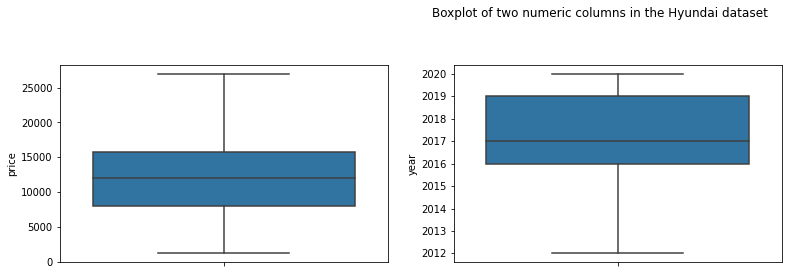

In [6]:
plt.figure(figsize=(20,8)) # width, height

    
plt.subplot(2,3,1)
sns.boxplot(y="price", data=df, showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(y="year", data=df, showfliers=False)


plt.suptitle("Boxplot of two numeric columns in the Hyundai dataset")
#plt.tight_layout()
plt.show()

The  above two-images  are boxplots with respect to price and year of hyundai dataset . A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.


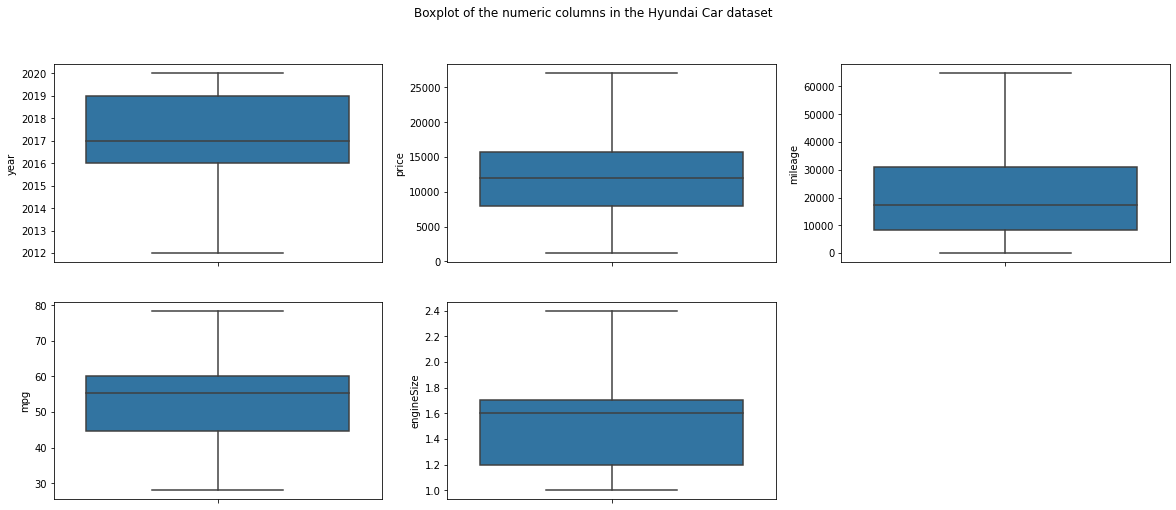

In [7]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)

plt.figure(figsize=(20,8)) 

for index in range(len(num_cols)):
    

    plt.subplot(2,3,index+1)
    sns.boxplot(y=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the Hyundai Car dataset")
plt.show()

Box plot is a method to graphically show the spread of a numerical variable through quartiles.

In fig 1 boxplot with respect to year, The bottom of the  box is the 25% percentile and the top is the 75% percentile value of the data.
In fig 4 boxplot with respect to mpg, The bottom of the  box is the 75% percentile and the top is the 25% percentile value of the data.

So, essentially the box represents the middle 50% of all the datapoints which represents the core region when the data is situated. The height of the boxplot is also called the Inter Quartile Range (IQR), which mathematically is the difference between the 75th and 25th percentile values of the data.




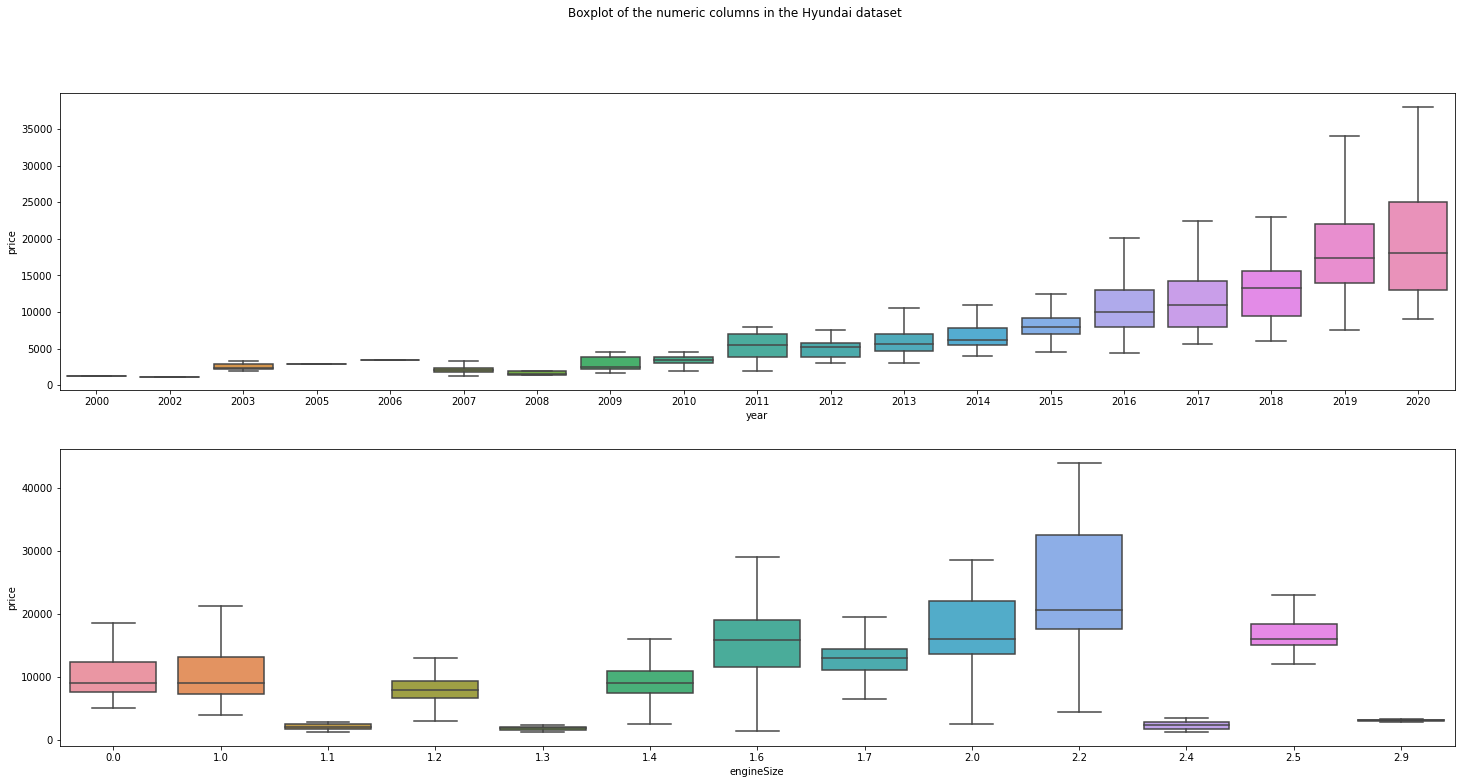

In [19]:
plt.figure(figsize=(25,12)) # width, height


plt.subplot(2,1,1)
   
sns.boxplot(x=df["year"],y=df["price"],showfliers=False)

plt.subplot(2,1,2)
sns.boxplot(x=df["engineSize"],y=df["price"],showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the Hyundai dataset")
plt.show()
#price-year #price-engine size

The above two figures shows us boxplot of year vs price and enginesize vs price

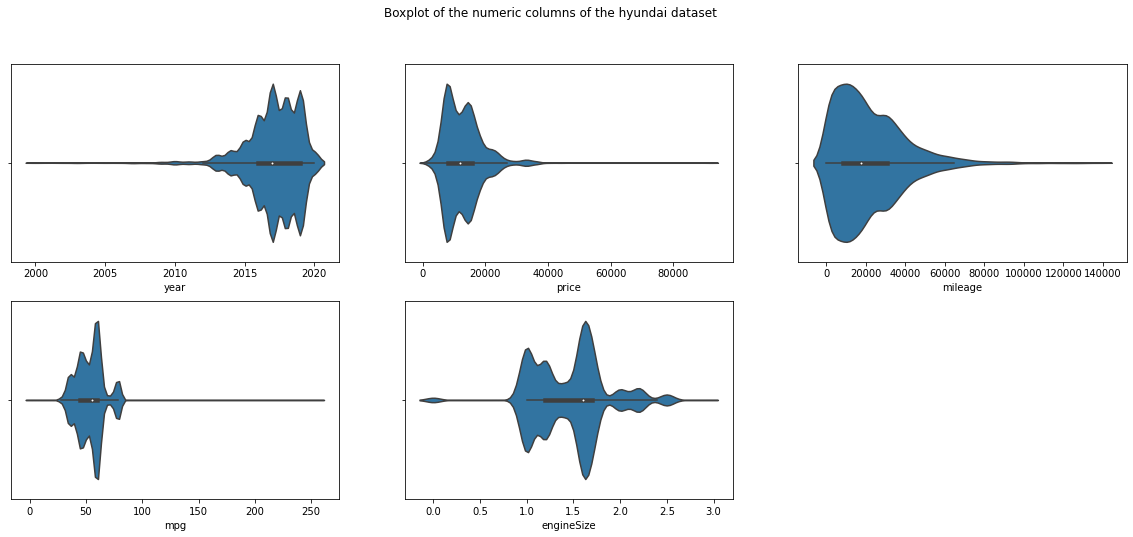

In [15]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns of the hyundai dataset")
#plt.tight_layout()
plt.show()


In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:
median (a white dot on the violin plot)
interquartile range (the black bar in the center of violin)
the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique  observations lying outside of these “fences” can be considered outliers.
The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.


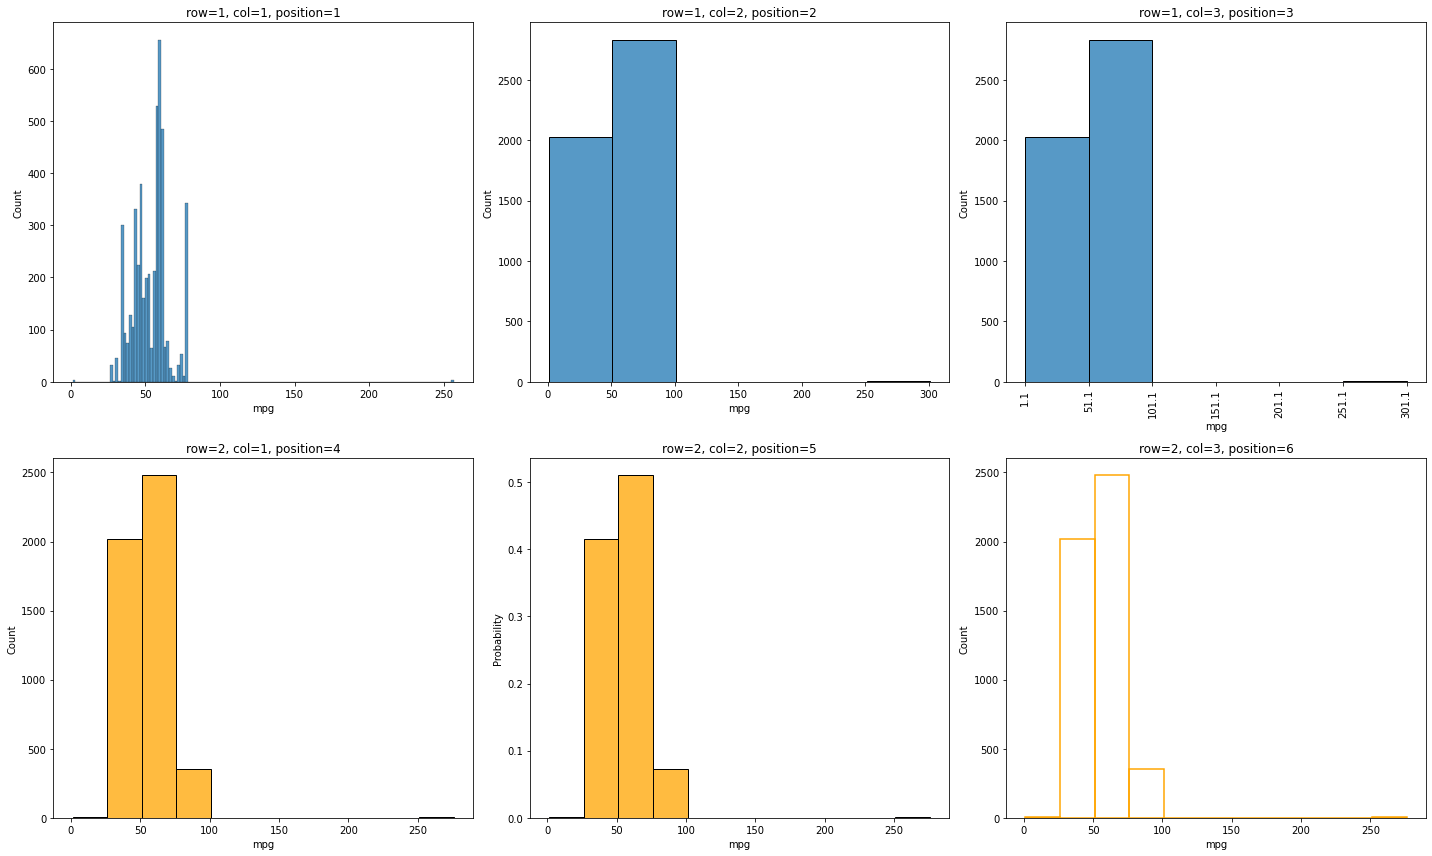

In [10]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="mpg", data=df)
plt.title("row=1, col=1, position=1")

plt.subplot(2,3,2)
sns.histplot(x="mpg", data=df, binwidth=50)
plt.title("row=1, col=2, position=2")

plt.subplot(2,3,3)
sns.histplot(x="mpg", data=df, binwidth=50)
plt.xticks(np.arange(df["mpg"].min(), df["mpg"].max()+51, 50), rotation=90)
plt.title("row=1, col=3, position=3")

plt.subplot(2,3,4)
sns.histplot(x="mpg", data=df, binwidth=25, color="orange")
plt.title("row=2, col=1, position=4")

plt.subplot(2,3,5)
sns.histplot(x="mpg", data=df, binwidth=25, color="orange", stat="probability")
plt.title("row=2, col=2, position=5")

plt.subplot(2,3,6)
sns.histplot(x="mpg", data=df, binwidth=25, color="orange", fill=False)
plt.title("row=2, col=3, position=6")

plt.tight_layout()
plt.show()

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.



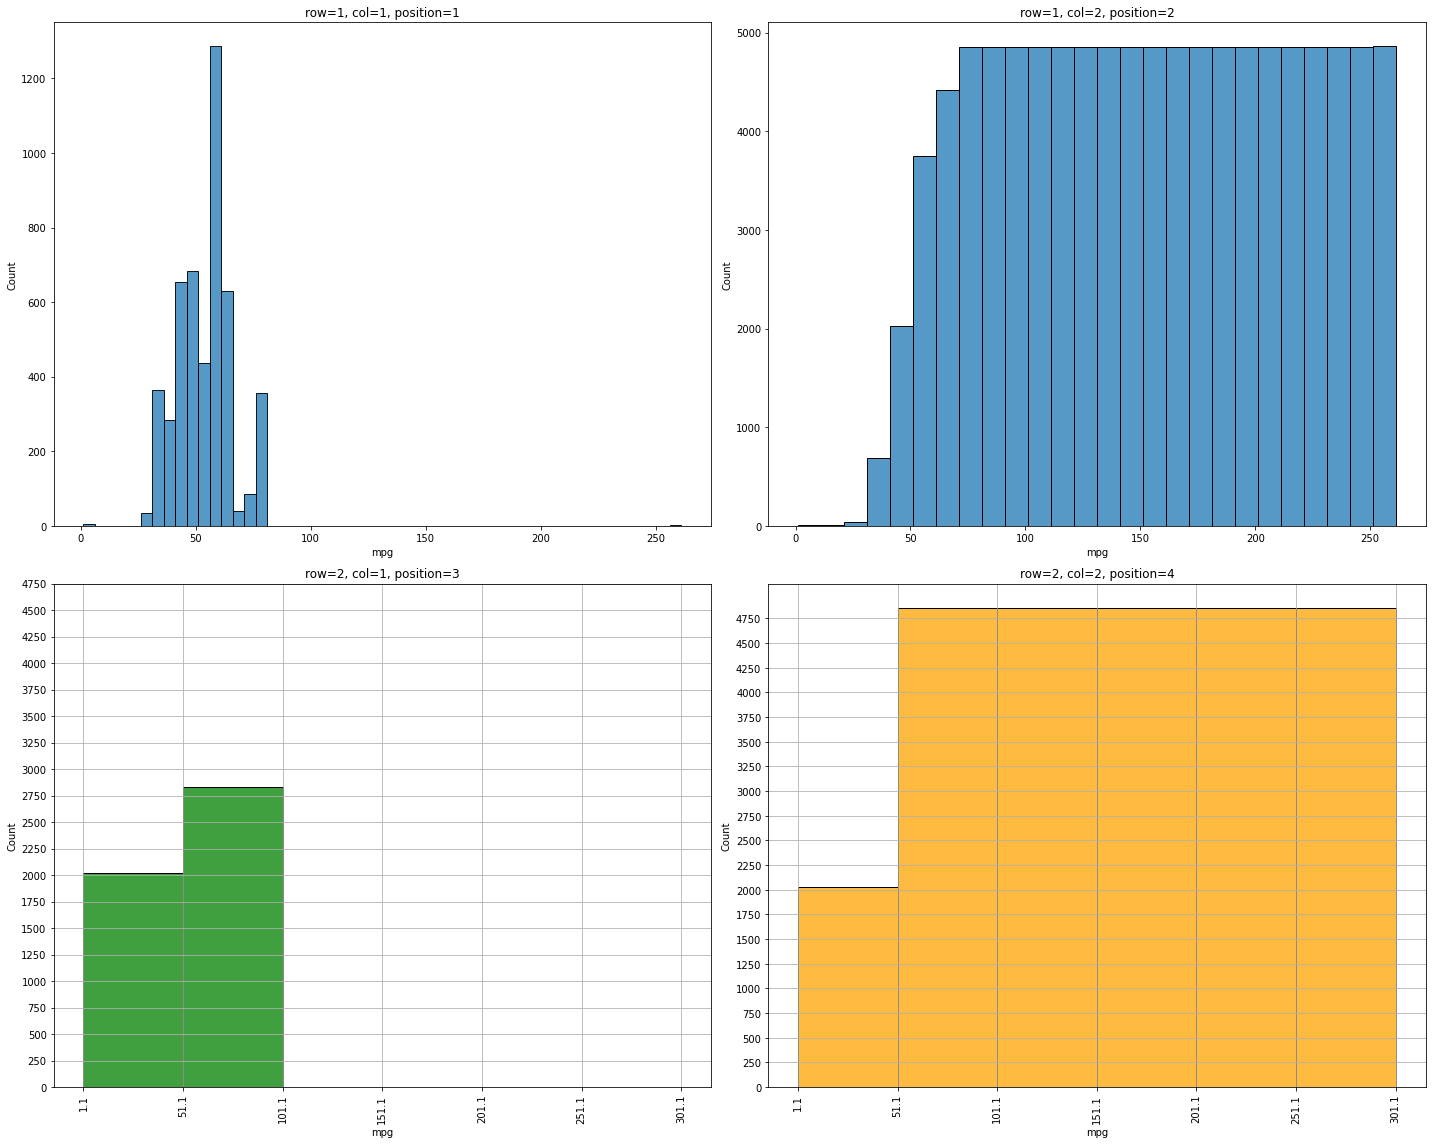

In [14]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="mpg", data=df, binwidth=5)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="mpg", data=df, binwidth=10, cumulative=True)
plt.title("row=1, col=2, position=2")

plt.subplot(2,2,3)
sns.histplot(x="mpg", data=df, binwidth=50,color="green")
plt.xticks(np.arange(df["mpg"].min(), df["mpg"].max()+51, 50), rotation=90)
plt.grid()
plt.yticks(np.arange(0,5000,250))
plt.title("row=2, col=1, position=3")

plt.subplot(2,2,4)
sns.histplot(x="mpg", data=df, binwidth=50, cumulative=True, color="orange")
plt.yticks(np.arange(0,5000,250))
plt.xticks(np.arange(df["mpg"].min(), df["mpg"].max()+51, 50), rotation=90)
plt.grid()
plt.title("row=2, col=2, position=4")

plt.tight_layout()
plt.show()


A histogram for a quantitative variable divides the range of the values into discrete classes, and then counts the number of observations falling into each class interval. The area of each bar in the histogram is proportional to the frequency in the class. When the class widths are equal, the height of the bar is also proportional to the frequency in the class.

